In [1]:
# COMPLETE SETUP:
import sys
import os
import numpy as np

print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

src_path = os.path.join(os.getcwd(), 'src')
src_path_abs = os.path.abspath(src_path)

waymo_module_path = None
local_src = os.path.abspath(os.path.join(os.getcwd(), 'src', 'waymo_open_dataset'))
if os.path.exists(local_src):
    waymo_module_path = local_src
    src_dir = os.path.abspath(os.path.join(os.getcwd(), 'src'))
    if src_dir not in sys.path:
        sys.path.insert(0, src_dir)   # ensure imports from src work
    print(f"FOUND waymo_open_dataset AT local src: {waymo_module_path}")
else:
    # 2) search existing sys.path entries (original behavior)
    for path in sys.path:
        potential_path = os.path.join(path, 'waymo_open_dataset')
        if os.path.exists(potential_path):
            waymo_module_path = potential_path
            print(f"FOUND waymo_open_dataset IN sys.path AT: {waymo_module_path}.")
            break
if not waymo_module_path:
    print("\twaymo_open_dataset DIRECTORY NOT FOUND IN ANY sys.path LOCATION.")


try:    # Check protobuf version
    import google.protobuf
    protobuf_version = google.protobuf.__version__
    print(f"Protobuf version: {protobuf_version}")
    
    if protobuf_version.startswith('3.20'):
        print("CORRECT protobuf VERSION!")
    else:
        print(f"\tWrong protobuf version ({protobuf_version}), need 3.20.3")
        print("Run this in terminal: conda activate waymo; pip install protobuf==3.20.3 --force-reinstall")
except Exception as e:
    print(f"\tProtobuf ERROR: {e}")


try:    # Test basic imports
    print(f"NumPy version: {np.__version__}")
    
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
    print("BASIC IMPORTS SUCCESSFUL.")
except Exception as e:
    print(f"\tBasic imports FAILED: {e}")


try:    # Import Waymo modules
    from waymo_open_dataset import dataset_pb2
    print("dataset_pb2 imported")
    
    from waymo_open_dataset.protos import scenario_pb2
    print("scenario_pb2 imported")
    
    from waymo_open_dataset.utils import womd_camera_utils
    print("womd_camera_utils imported")
    
    # Import additional utility modules for data processing
    from waymo_open_dataset.utils import range_image_utils
    from waymo_open_dataset.utils import transform_utils
    from waymo_open_dataset.utils import frame_utils
    print("Additional utils imported")
    
    print("ALL WAYMO IMPORTS SUCCESSFUL!")
except ImportError as e:
    print(f"\tWaymo import FAILED: {e}")
    print("\nSOLUTIONS:")
    print("1. Make sure you're in the correct directory (waymo-open-dataset/tutorial)")
    print("In /src/waymo_open_dataset you should have libraries (like math, metrics, protos, utils), __pycache__, bazel etc.")
    print("IF NOT: clone the repo: https://github.com/waymo-research/waymo-open-dataset.git")
    print("2. Compile proto files first:")
    print("   - Change to src directory: os.chdir('../src')")
    print("   - Run: subprocess.run(['python', '-m', 'grpc_tools.protoc', '--python_out=.', '--proto_path=.'] + glob.glob('waymo_open_dataset/**/*.proto', recursive=True))")
    print("3. Or run this compilation now:")
    try:    # Try to compile proto files automatically
        import subprocess
        import glob
        current_dir = os.getcwd() # Change to src directory
        src_dir = None
        for potential_src in [os.path.join(current_dir, '..', 'src'),   # Find src directory
                             os.path.join(current_dir, 'src'),
                             r'c:\Users\radov\dev\waymo-open-dataset\src']:
            if os.path.exists(potential_src):
                src_dir = potential_src
                break
        if src_dir:
            print(f"   Found src directory: {src_dir}")
            os.chdir(src_dir)
            # Get proto files
            proto_files = glob.glob('waymo_open_dataset/**/*.proto', recursive=True)
            print(f"   Found {len(proto_files)} proto files")
            if proto_files:
                # Compile proto files
                cmd = ['python', '-m', 'grpc_tools.protoc', '--python_out=.', '--proto_path=.'] + proto_files
                result = subprocess.run(cmd, capture_output=True, text=True)
                
                if result.returncode == 0:
                    print("   Proto FILES COMPILED SUCCESSFULLY!")
                    os.chdir(current_dir)  # Return to original directory
                    print("\tPlease restart the kernel and run this cell again")
                else:
                    print(f"\tProto compilation FAILED: {result.stderr}")
                    os.chdir(current_dir)
            else:
                print("\tNo proto files found")
                os.chdir(current_dir)
        else:
            print("\tCould not find src directory")
    except Exception as compile_error:
        print(f"\tAuto-compilation FAILED: {compile_error}")
except Exception as e:
    print(f"\tUnexpected ERROR: {e}")

camera_names = {1: 'FRONT', 2: 'FRONT_LEFT', 3: 'FRONT_RIGHT', 4: 'SIDE_LEFT', 5: 'SIDE_RIGHT'}
laser_names = {1: 'TOP', 2: 'FRONT', 3: 'SIDE_LEFT', 4: 'SIDE_RIGHT', 5: 'REAR'}
label_types = {1: 'Vehicle', 2: 'Pedestrian', 3: 'Sign', 4: 'Cyclist'}
print("MAPPINGS DEFINED.")

print(f"\nSETUP COMPLETE!")
print(f"If you see any errors above, restart the kernel and run this cell again.")

Python version: 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 17:49:16) [MSC v.1929 64 bit (AMD64)]
Python executable: c:\Users\radov\.conda\envs\waymo\python.exe
FOUND waymo_open_dataset AT local src: c:\Users\radov\dev\waymo-open-dataset\src\waymo_open_dataset
Protobuf version: 3.20.3
CORRECT protobuf VERSION!
NumPy version: 1.23.5

TensorFlow version: 2.15.0
BASIC IMPORTS SUCCESSFUL.
dataset_pb2 imported
scenario_pb2 imported
womd_camera_utils imported
Additional utils imported
ALL WAYMO IMPORTS SUCCESSFUL!
MAPPINGS DEFINED.

SETUP COMPLETE!
If you see any errors above, restart the kernel and run this cell again.


In [ ]:
# TRAINING FILES:
training_files = []

try:
    for filename in os.listdir(r".\data\scenario\training"):
        if filename != '.gitkeep':
            filepath = os.path.join(r".\data\scenario\training", filename)
            if os.path.isfile(filepath):
                training_files.append(filepath)
except Exception as e:
    print(e)

# STRUCTURE OF THE DATA: Multi-agent trajectories, map features, dynamic states in Timestamped agent states + road geometry
#                        max 128 agents per scenario, max 20000 road graph points and max 16 traffic lights


In [22]:
# PARSING FUNCTIONS:
def parse_training_file(training_file):
    scenario_dataset = tf.data.TFRecordDataset(training_file, compression_type='')
    scenarios = []

    for raw_record in scenario_dataset:
        try:
            scenario = scenario_pb2.Scenario.FromString(raw_record.numpy())
            scenarios.append(scenario)
        except Exception as e:
            print(f"Error parsing scenario: {e}")
            break
    return scenarios

In [24]:
# TRAINING DATASET:
training_dataset = {}   # training_file_ID: [training_scenarios]

try:
    for training_file in enumerate(training_files):
        training_file_index = training_file[0]
        training_file_path = training_file[1]
        #print(training_file_path)

        dataset_record = tf.data.TFRecordDataset(training_file_path, compression_type='')

        training_dataset[training_file_index] = parse_training_file(training_file_path)

        print(f"Added {len(training_dataset[training_file_index])} training_scenarios to training_dataset array of training_file with ID = {training_file_index} (from {training_file_path})")

except Exception as e:
    print(f"Error processing training dataset: {e}")

Added 289 training_scenarios to training_dataset array of training_file with ID = 0 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00000-of-00150)
Added 285 training_scenarios to training_dataset array of training_file with ID = 1 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00001-of-00150)
Added 285 training_scenarios to training_dataset array of training_file with ID = 1 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00001-of-00150)
Added 306 training_scenarios to training_dataset array of training_file with ID = 2 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00002-of-00150)
Added 306 training_scenarios to training_dataset array of training_file with ID = 2 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00002-of-00150)


In [29]:
def analyze_scenario(scenario):
    print("-------------------------")
    print("The scenario:")
    print("- Stats:")
    print(f"   - Scenario ID: {scenario.scenario_id}")
    print(f"   - SDC index: {scenario.sdc_track_index}")
    print(f"   - # of timesteps (seconds): {len(scenario.timestamps_seconds)}")
    print(f"   - time range: {scenario.timestamps_seconds[0]:.1f}s to {scenario.timestamps_seconds[-1]:.1f}s")
    print(f"   - duration: {scenario.timestamps_seconds[-1] - scenario.timestamps_seconds[0]:.1f}s")
    print(f"   - tracks (agents): {len(scenario.tracks)}")

    track_types = {}
    sdc_count = 0
    tracks_to_predict = 0
            
    for track in scenario.tracks:
        track_type = track.object_type
        type_name = {
            1: 'Vehicle',
            2: 'Pedestrian', 
            3: 'Cyclist',
            4: 'Other'
        }.get(track_type, f'Type_{track_type}')
                
        track_types[type_name] = track_types.get(type_name, 0) + 1
                
        # Check if this is SDC or prediction target
        if hasattr(track, 'id'):
            for map_feature in scenario.map_features:
                if hasattr(map_feature, 'id') and map_feature.id == track.id:
                    if hasattr(map_feature, 'is_sdc') and map_feature.is_sdc:
                        sdc_count += 1
                
        # Check if track needs prediction (has future states)
        if len(track.states) > 10:  # Assuming current + future states
            tracks_to_predict += 1
            
    print(f" - Track types:")
    for type_name, count in track_types.items():
        print(f"   - {type_name}: {count}")
            
    # Map features analysis
    print(f" - Map features: {len(scenario.map_features)}")
            
    map_feature_types = {}
    for feature in scenario.map_features:
        feature_type = feature.WhichOneof('feature_data')
        if feature_type:
            map_feature_types[feature_type] = map_feature_types.get(feature_type, 0) + 1
            
    if map_feature_types:
        print(f" - Map feature types:")
        for feature_type, count in map_feature_types.items():
            print(f"   - {feature_type}: {count}")
            
    # Dynamic map states
    print(f" - Dynamic states: {len(scenario.dynamic_map_states)}")

In [30]:
analyze_scenario(training_dataset[0][0]) # training_dataset[fileID][scenario]
#analyze_scenario(training_dataset[0][1])
#analyze_scenario(training_dataset[0][2])

-------------------------
The scenario:
- Stats:
   - Scenario ID: 53efd22f9e0bd276
   - SDC index: 48
   - # of timesteps (seconds): 11
   - time range: 0.0s to 1.0s
   - duration: 1.0s
   - tracks (agents): 49
 - Track types:
   - Vehicle: 34
   - Pedestrian: 15
 - Map features: 175
 - Map feature types:
   - road_line: 23
   - road_edge: 15
   - lane: 103
   - crosswalk: 4
   - stop_sign: 2
   - driveway: 28
 - Dynamic states: 11


In [69]:
# VISUALIZATION FUNCTIONS:
def render_map_features(scenario, ax):
    print(" Rendering map features...")
    for feature in scenario.map_features:
        feature_data = feature.WhichOneof('feature_data')
        if feature_data == 'lane' and hasattr(feature.lane, 'polyline'):
            x_coords = [point.x for point in feature.lane.polyline]
            y_coords = [point.y for point in feature.lane.polyline]
            ax.plot(x_coords, y_coords, 'lightgray', linewidth=1, alpha=0.6)
        elif feature_data == 'road_line' and hasattr(feature.road_line, 'polyline'):
            x_coords = [point.x for point in feature.road_line.polyline]
            y_coords = [point.y for point in feature.road_line.polyline]
            ax.plot(x_coords, y_coords, 'gray', linewidth=1.5, alpha=0.8)
        elif feature_data == 'road_edge' and hasattr(feature.road_edge, 'polyline'):
            x_coords = [point.x for point in feature.road_edge.polyline]
            y_coords = [point.y for point in feature.road_edge.polyline]
            ax.plot(x_coords, y_coords, 'black', linewidth=2, alpha=0.9)

def render_agents(scenario, timestep, colors, ax, show_future=True):
    print(" Rendering agents...")
    sdc_idx = getattr(scenario, 'sdc_track_index', None)
    for track in scenario.tracks:
        if timestep >= len(track.states) or not track.states[timestep].valid:
            continue
            
        agent_color = colors.get(track.object_type, '#95a5a6')
        
        # Get trajectory points
        trajectory_x = []
        trajectory_y = []
        for state in track.states:
            if state.valid:
                trajectory_x.append(state.center_x)
                trajectory_y.append(state.center_y)
        
        # Plot trajectory
        if len(trajectory_x) > 1:
            # Past (solid)
            past_x = trajectory_x[:timestep+1]
            past_y = trajectory_y[:timestep+1]
            if len(past_x) > 1:
                ax.plot(past_x, past_y, color=agent_color, linewidth=2, alpha=0.8)
            
            # Future (dashed)
            if show_future and timestep < len(trajectory_x) - 1:
                future_x = trajectory_x[timestep:]
                future_y = trajectory_y[timestep:]
                if len(future_x) > 1:
                    ax.plot(future_x, future_y, color=agent_color, 
                           linewidth=2, linestyle='--', alpha=0.6)
        
        # Current position
        current = track.states[timestep]
        x, y = current.center_x, current.center_y
        
        # Agent representation
        size = 60 if track.object_type == 1 else 40
        
        if track.id == training_dataset[0][0].tracks[sdc_idx].id:
            # Special SDC marker
            ax.scatter(x, y, c='#27ae60', s=size*1.5, 
                      edgecolors="#08532b", linewidths=2, zorder=15)
            ax.annotate('SDC', xy=(x, y), xytext=(8, 8), 
                       textcoords='offset points', fontsize=8, 
                       fontweight='bold', color='#08532b')
        else:
            ax.scatter(x, y, c=agent_color, s=size, marker='o',
                      edgecolors='white', linewidths=1, zorder=12)
        
        # Agent ID
        ax.annotate(str(track.id), xy=(x, y), xytext=(0, -15),
                   textcoords='offset points', fontsize=8, ha='center',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

VISUALIZING SCENARIO: 53efd22f9e0bd276
 Time: 0.0s
 Rendering map features...
 Rendering agents...
   - 23 Vehicles
   - 5 Pedestrians
   - Duration: 1.0s
   - Map features: 175


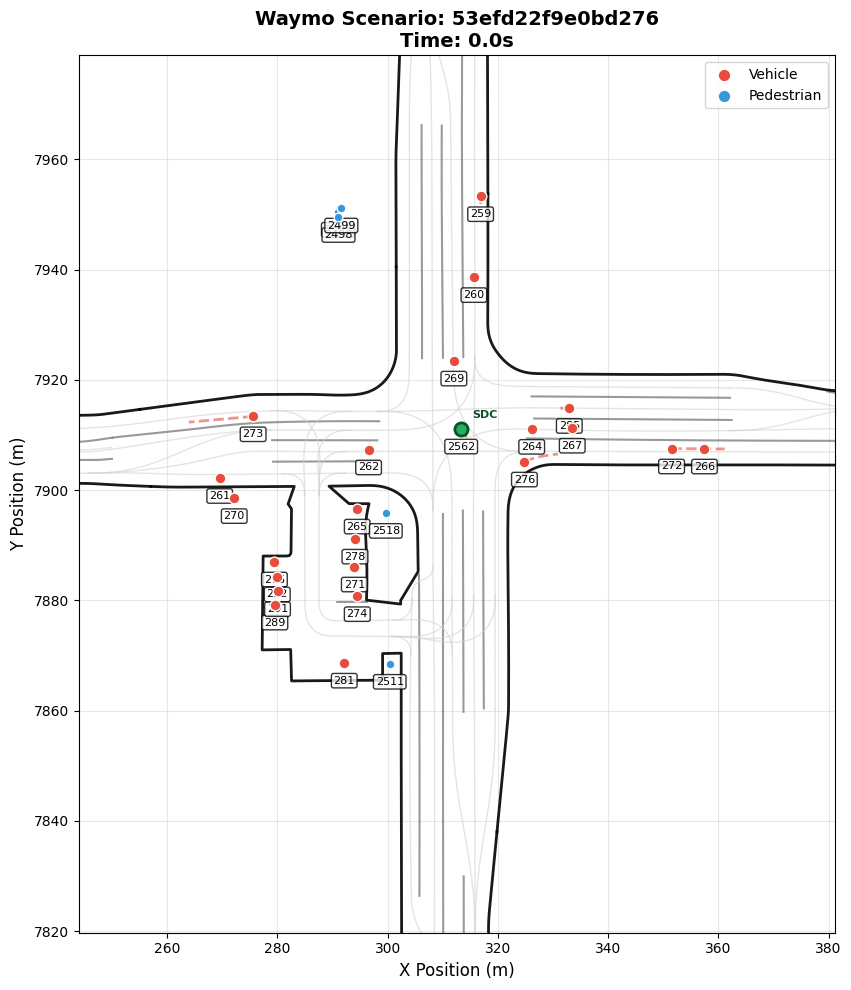

In [84]:
# SCENARIO VISUALIZATION:
import matplotlib.pyplot as plt

def visualize_scenario(scenario, timestep=0, show_future=True, figsize=(12, 10), print_stats=False):
    """Visualize a Waymo scenario."""
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    colors = {1: '#e74c3c', 2: '#3498db', 3: '#f39c12', 4: '#9b59b6'}
    type_names = {1: 'Vehicle', 2: 'Pedestrian', 3: 'Cyclist', 4: 'Other'}

    print(f"VISUALIZING SCENARIO: {scenario.scenario_id}")
    print(f" Time: {scenario.timestamps_seconds[timestep]:.1f}s")
    
    render_map_features(scenario, ax)
    
    render_agents(scenario, timestep, colors, ax)
    
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X Position (m)', fontsize=12)
    ax.set_ylabel('Y Position (m)', fontsize=12)
    ax.set_title(f'Waymo Scenario: {scenario.scenario_id}\nTime: {scenario.timestamps_seconds[timestep]:.1f}s', 
                fontsize=14, fontweight='bold')
    all_x = [state.center_x for track in scenario.tracks for state in track.states if state.valid]  # Auto-scale with margin
    all_y = [state.center_y for track in scenario.tracks for state in track.states if state.valid]
    if all_x and all_y:
        margin = 20
        ax.set_xlim(min(all_x) - margin, max(all_x) + margin)
        ax.set_ylim(min(all_y) - margin, max(all_y) + margin)
    for obj_type, color in colors.items():
        if obj_type in [t.object_type for t in scenario.tracks]:
            ax.scatter([], [], c=color, s=50, label=type_names[obj_type])
    ax.legend()
    plt.tight_layout()

    if print_stats:
        agent_counts = {}
        for track in scenario.tracks:
            if timestep < len(track.states) and track.states[timestep].valid:
                agent_type = type_names.get(track.object_type, 'Other')
                agent_counts[agent_type] = agent_counts.get(agent_type, 0) + 1
            
        for agent_type, count in agent_counts.items():
            print(f"   - {count} {agent_type}{'s' if count != 1 else ''}")
            
        print(f"   - Duration: {scenario.timestamps_seconds[-1] - scenario.timestamps_seconds[0]:.1f}s")
        print(f"   - Map features: {len(scenario.map_features)}")

    return fig, ax

fig, ax = visualize_scenario(training_dataset[0][0], timestep=0, show_future=True, print_stats=True)

VISUALIZING SCENARIO: 53efd22f9e0bd276
 Time: 1.0s
 Rendering map features...
 Rendering agents...
   - 23 Vehicles
   - 6 Pedestrians
   - Duration: 1.0s
   - Map features: 175


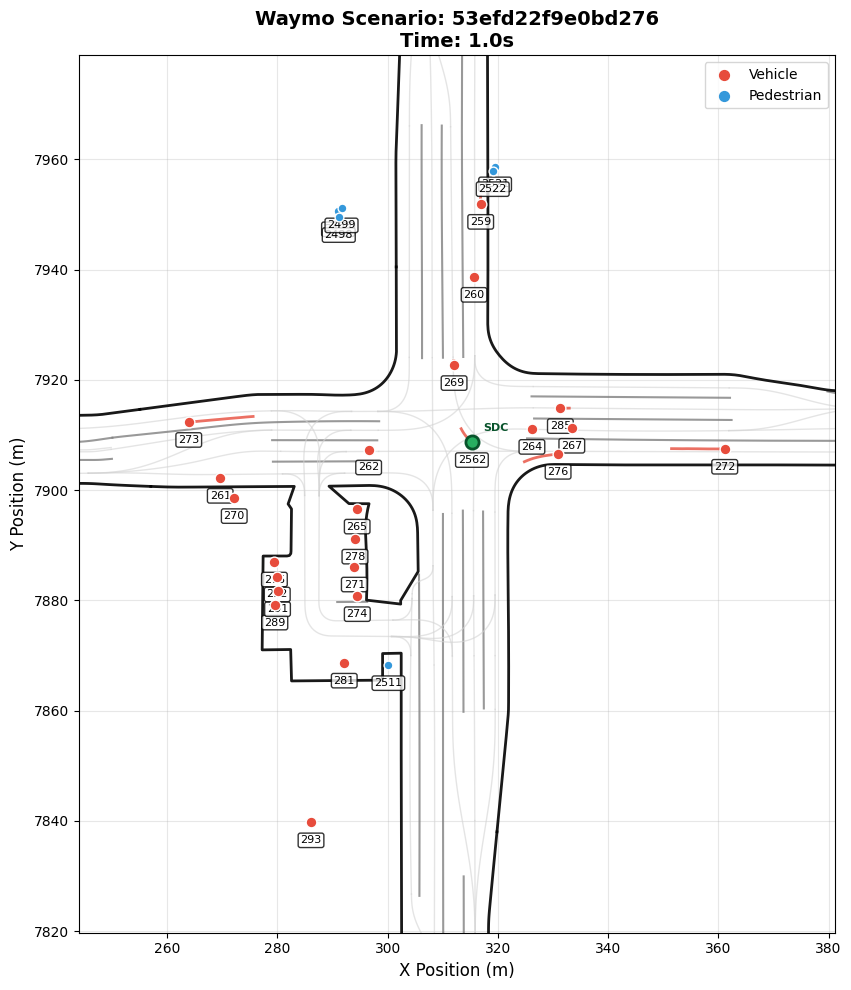

In [85]:
fig, ax = visualize_scenario(training_dataset[0][0], timestep=10, show_future=True, print_stats=True)